Processing image: orig_finger_20250107_101943.png


<IPython.core.display.Javascript object>


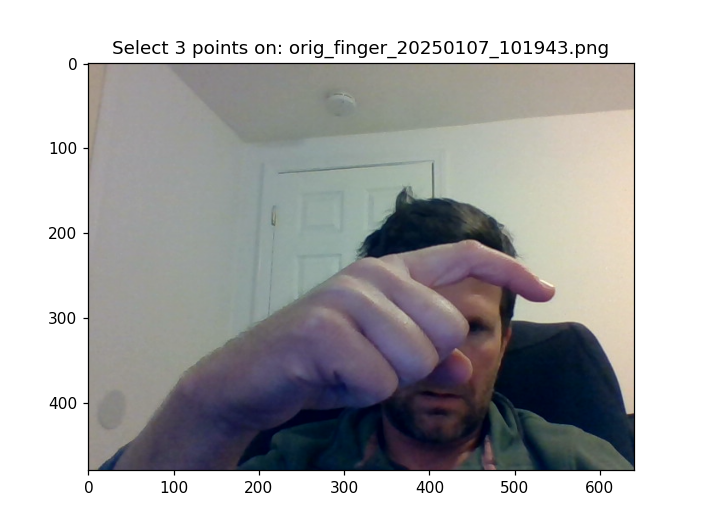

Processing image: orig_finger_20250107_101945.png


<IPython.core.display.Javascript object>


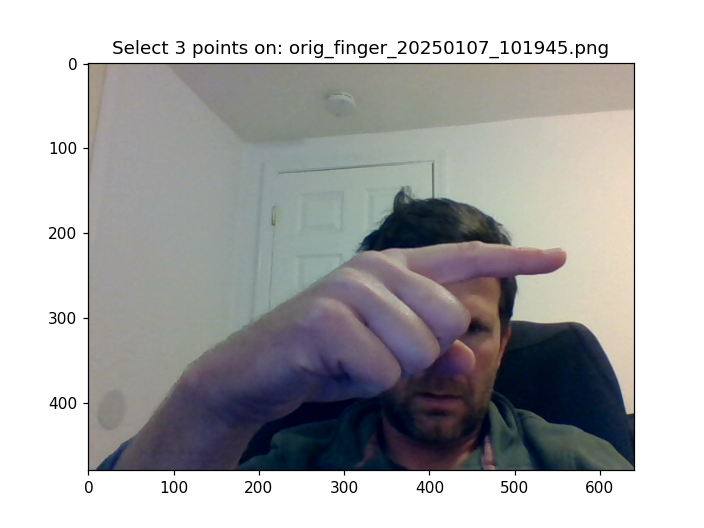

Processing image: orig_finger_20250107_101946.png


<IPython.core.display.Javascript object>


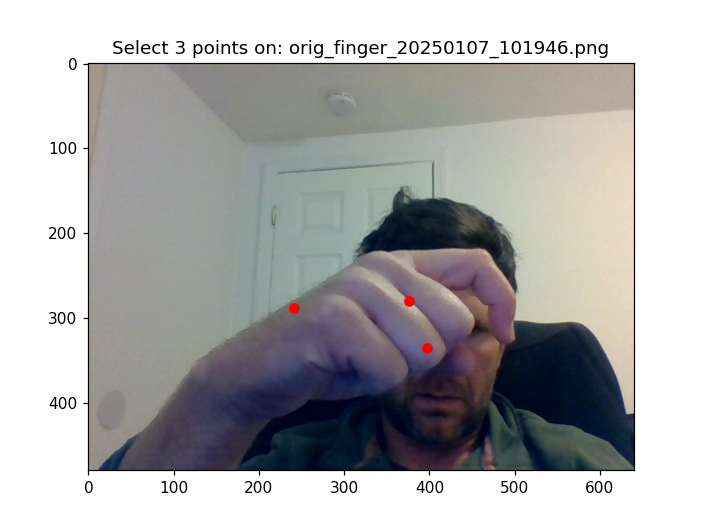

ValueError: Cannot set a DataFrame with multiple columns to the single column Angle (degrees)

In [15]:
# Enable external backend for interactive figures
%matplotlib tk

import os
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.widgets import Cursor
import numpy as np

# Initialize the DataFrame
columns = ['Image', 'Point1_x', 'Point1_y', 'Point2_x', 'Point2_y', 'Point3_x', 'Point3_y']
points_df = pd.DataFrame(columns=columns)

# Function to collect points
def select_points(image_path):
    img = plt.imread(image_path)
    if img is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")

    fig, ax = plt.subplots()
    ax.imshow(img, aspect='auto')  # Ensure proper display of the image
    plt.title(f"Select 3 points on: {os.path.basename(image_path)}")

    # List to store the selected points
    points = []

    # Cursor for better point selection visibility
    cursor = Cursor(ax, useblit=True, color='red', linewidth=1)

    # Function to handle mouse clicks
    def onclick(event):
        if event.xdata is not None and event.ydata is not None:  # Ensure valid click
            if len(points) < 3:  # Limit to 3 points
                points.append((event.xdata, event.ydata))
                ax.plot(event.xdata, event.ydata, 'ro')  # Mark the point
                fig.canvas.draw()
            if len(points) == 3:  # Stop interaction after 3 points
                plt.close(fig)

    # Connect the click event to the figure
    fig.canvas.mpl_connect('button_press_event', onclick)
    plt.show(block=True)  # Blocks execution until the figure is closed
    return points

# Path to the folder containing images
image_folder = 'C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Code/python/snapshots'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Loop through images and collect points
all_points = []
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    print(f"Processing image: {image_file}")
    selected_points = select_points(image_path)

    if len(selected_points) == 3:  # Ensure exactly 3 points are selected
        points_row = {
            'Image': image_file,
            'Point1_x': selected_points[0][0], 'Point1_y': selected_points[0][1],
            'Point2_x': selected_points[1][0], 'Point2_y': selected_points[1][1],
            'Point3_x': selected_points[2][0], 'Point3_y': selected_points[2][1],
        }
        all_points.append(points_row)

# Create a DataFrame from the collected points
points_df = pd.DataFrame(all_points)

# Function to calculate the angle between two vectors
def calculate_angle(row):
    # Extract points from the row
    point1 = np.array([row['Point1_x'], row['Point1_y']])
    point2 = np.array([row['Point2_x'], row['Point2_y']])
    point3 = np.array([row['Point3_x'], row['Point3_y']])

    # Calculate vectors
    vector1 = point1 - point2
    vector2 = point3 - point2

    # Compute dot product and magnitudes
    dot_product = np.dot(vector1, vector2)
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)

    # Avoid division by zero
    if magnitude1 == 0 or magnitude2 == 0:
        return np.nan  # Undefined angle

    # Calculate the angle in radians
    angle_radians = np.arccos(dot_product / (magnitude1 * magnitude2))

    # Convert to degrees
    angle_degrees = 180 - np.degrees(angle_radians)
    return angle_degrees  # Return a single scalar value

# Apply the function to calculate angles for each row
points_df['Angle (degrees)'] = points_df.apply(calculate_angle, axis=1)

print(points_df)


In [12]:
pip install ipywidgets
jupyter nbextension enable --py widgetsnbextension


SyntaxError: invalid syntax (3280527727.py, line 1)